# Project UCSC Extension DBDA.x414
## Author : Jammy Chan
## Date    : Mar 16, 2020

### Introduction
The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli.  Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15.

### Data set
Letter Recognition Data Set from UCI https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data

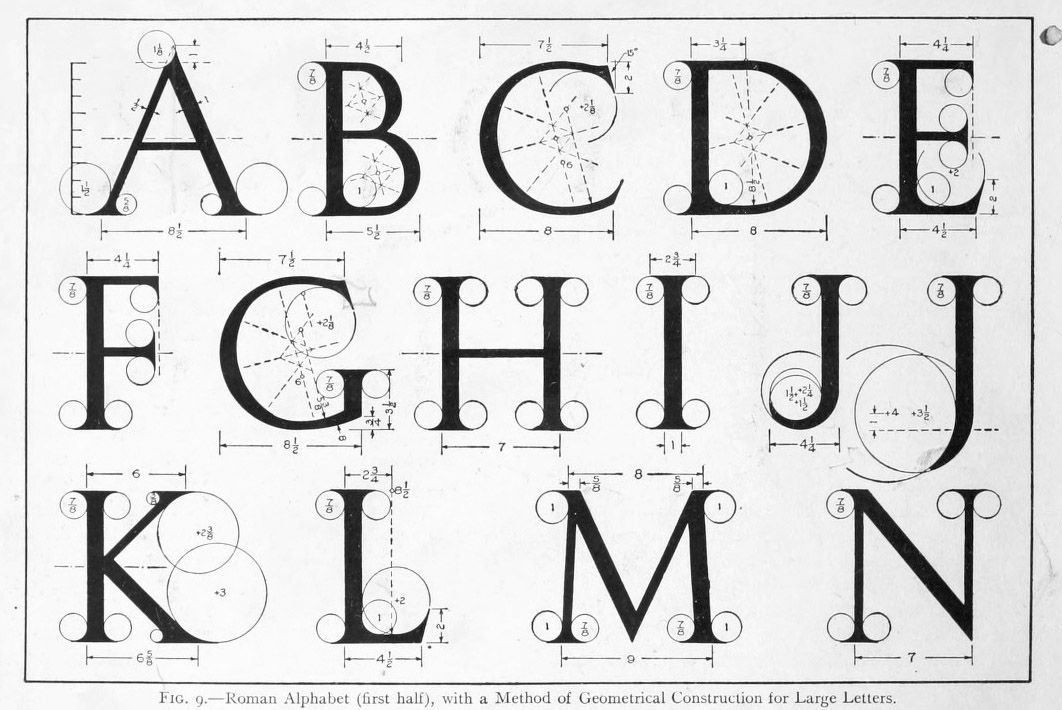

In [2]:
from IPython.display import Image
Embed = Image('https://i.pinimg.com/originals/d1/a5/4e/d1a54ee3d208a4ad5b26f42ce0deb037.jpg', width=600, height=400)
Embed

### Data attributes:

- letter	        [capital letter	                (26 values from A to Z)]
- x_box	            [horizontal position of box	    (integer)]
- y_box	            [vertical position of box	    (integer)]
- width	            [width of box			        (integer)]
- height 	        [height of box			        (integer)]
- total_pixels	    [total # of pixels		        (integer)]
- mean_x_pixels	    [mean x of on pixels in box	    (integer)]
- mean_y_pixels	    [mean y of on pixels in box	    (integer)]
- mean_x_variance	[mean x variance			        (integer)]
- mean_y_variance	[mean y variance			        (integer)]
- mean_xy_corr	    [mean x y correlation	  	    (integer)]
- mean_x2y	        [mean of x * x * y		        (integer)]
- mean_xy2	        [mean of x * y * y		        (integer)]
- x_edge	        [mean edge count left to right	(integer)]
- x_edgey	        [correlation of x-edge with y	(integer)]
- y_edge	        [mean edge count bottom to top	(integer)]
- y_edgex	        [correlation of y-edge with x	(integer)]
        


### Data Exploration

In [3]:
import pandas as pd
attributes = ['letter', 'x_box', 'y_box', 'width', 'height', 'total_pixels', 'mean_x_pixels', 'mean_y_pixels', 'mean_x_variance', 'mean_y_variance', 'mean_xy_corr', 'mean_x2y', 'mean_xy2', 'x_edge', 'xedgey', 'y_edge', 'yedgex']


letters_data_raw = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data", header=None, names=attributes)
letters_data_raw.describe(include='all')

,letter,x_box,y_box,width,height,total_pixels,mean_x_pixels,mean_y_pixels,mean_x_variance,mean_y_variance,mean_xy_corr,mean_x2y,mean_xy2,x_edge,xedgey,y_edge,yedgex
count,20000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,NaN,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,NaN,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,NaN,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,NaN,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000


In [5]:
letters_data_raw.tail(1)

,letter,x_box,y_box,width,height,total_pixels,mean_x_pixels,mean_y_pixels,mean_x_variance,mean_y_variance,mean_xy_corr,mean_x2y,mean_xy2,x_edge,xedgey,y_edge,yedgex
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


### Check data imbalance
Calculate the imbalance factor using Shannon entrophy formula.

Balance = H / log k

- k is the number of classes
- Ci = size of cluster i
- n = total size of samples

H = - sum(Ci / n * log (Ci / n)) where i is from 1 to k


In [28]:
# check data imbalance from Shannon entrophy
def isBalance(dlist):
    import math
    k = len(dlist)
    H = -sum([d * math.log(d) for d in dlist])
    balance = H / math.log(k)
    return balance

In [29]:
letters_data_raw['letter'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
Z    734
H    734
Name: letter, dtype: int64

In [30]:
# range from 0 to 1. Value tends to 0 - imbalance, 1 - balance
isBalance(pd.Series.tolist(letters_data_raw['letter'].value_counts()/len(letters_data_raw)))


0.999866184526204

### Data distribution per feature

In [31]:
# data cleaning, splitting, scaling
letters_labels = letters_data_raw['letter']
letters_data = letters_data_raw.drop(columns=['letter'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30125450>,
      dtype=object)

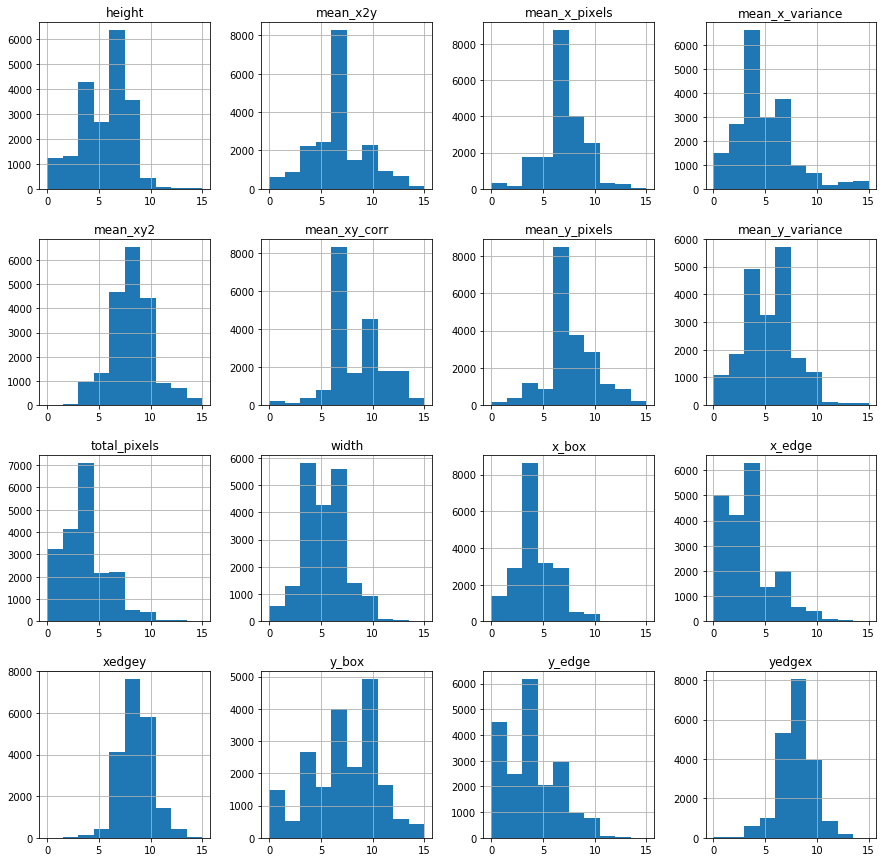

In [32]:
# check feature distributions
letters_data.hist(figsize=(15,15))

### Data preprocessing
- Splitting and scaling feature data
- Normalize the feature values

In [33]:
from sklearn.preprocessing import StandardScaler 
# perform standard scaling
scaler = StandardScaler()  
scaler.fit(letters_data)
letters_data_scaled = pd.DataFrame(scaler.transform(letters_data))

Feature values distribution after standard scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f3b9910>,
      dtype=object)

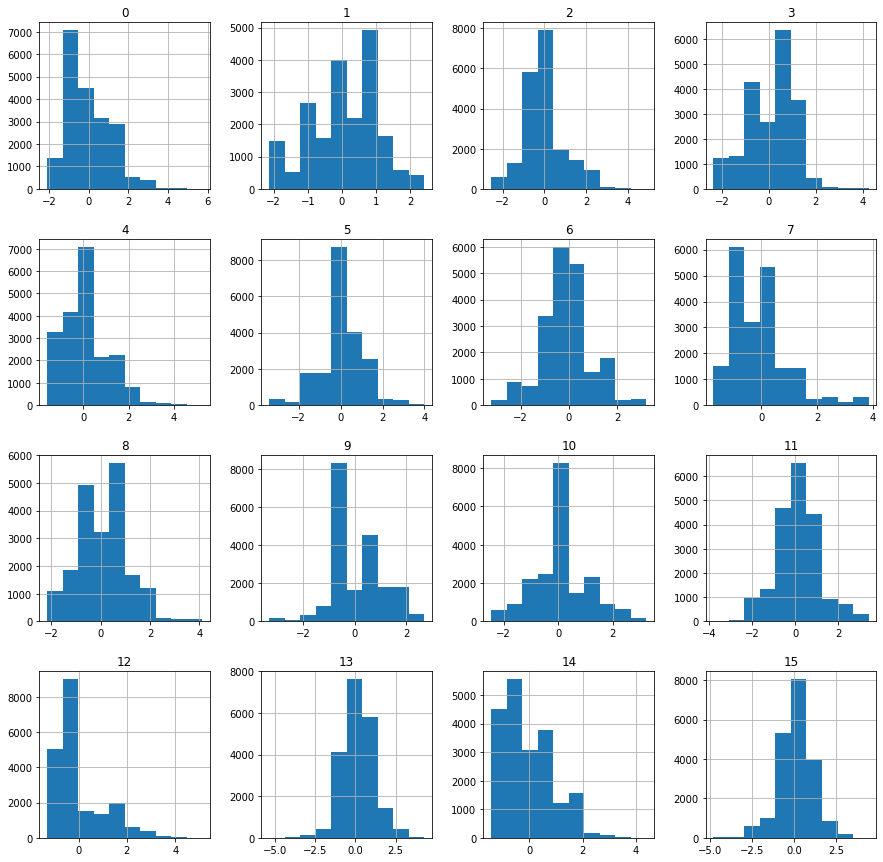

In [34]:
letters_data_scaled.hist(figsize=(15,15))

After standardize scaling, the distribution shifts with center at 0.

### Factorize catagorical label

In [35]:
print(set(letters_labels))
letters_labels = pd.factorize(letters_labels)[0]
print(set(letters_labels))

{'K', 'I', 'W', 'D', 'H', 'M', 'Z', 'J', 'N', 'B', 'P', 'V', 'O', 'U', 'E', 'G', 'C', 'F', 'T', 'X', 'Q', 'S', 'L', 'A', 'R', 'Y'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}


### Model Evaluations

For typical multiclass classification problem, the following classification models are considered:
- Decision Tree
- Random Forest
- K-Nearest Neighbor
- Naive Bayes
- SVC
- Logistic Regression

During the model evaluations, both hold out and K-hold validations will be used.
 

In [36]:
# First constructing model class list 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
models = {}
model_eval = pd.DataFrame(columns = [])
seed = 123
numcpu = 4
models['RF'] = RandomForestClassifier(n_jobs=numcpu, random_state=seed, oob_score=True)
models['KNN'] = KNeighborsClassifier(n_jobs=numcpu, n_neighbors=5)
models['DT'] = DecisionTreeClassifier(criterion="gini", random_state=seed)
models['NB'] = GaussianNB()
models['SVM'] = SVC()
models['LOG'] = LogisticRegression(C=1, n_jobs=numcpu, random_state=seed, multi_class='ovr', penalty='l2', solver='sag')

### K-fold validation
First, evaluate each model by using k-fold validation. 

** This might take a minute **

In [37]:
from sklearn.model_selection import cross_val_score

for idx, mname in enumerate(models.keys()):
    model_eval.loc[idx, 'Model Name'] = mname
    model_eval.loc[idx, 'K-Fold Accuracy'] = cross_val_score(models[mname], letters_data, letters_labels, cv = 10, scoring='accuracy').mean()
model_eval.sort_values(by = ['K-Fold Accuracy'], ascending = False, inplace = True)

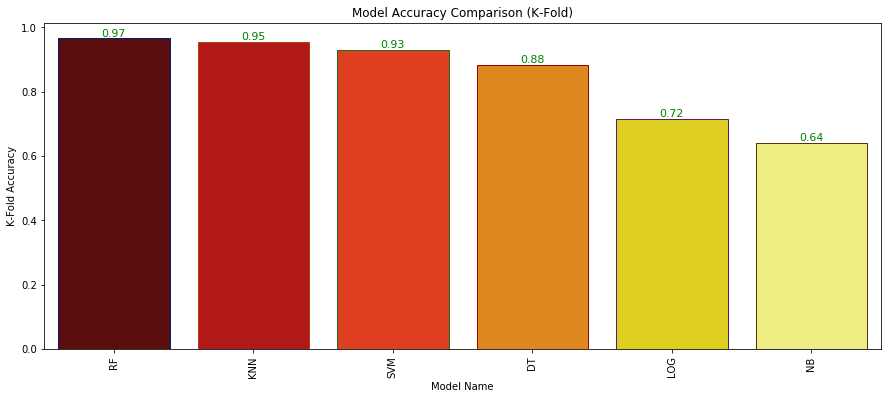

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,6))
g=sn.barplot(x="Model Name", y="K-Fold Accuracy",data=model_eval,palette='hot',edgecolor=sn.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Accuracy Comparison (K-Fold)')
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='green', xytext=(0, 5), textcoords='offset points')
plt.show()

### Hold-Out Validation
Use standard 80/20 Train/Test sets for validation. The drawback of hold-out validation is the accuracy depends on the selection of the hold-out sets. Even though randomization is there, it is possible the selection of train versus test may provide different results.

** This might take a minute **

In [39]:
# Split train/test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(letters_data_scaled, letters_labels, test_size = 0.2, stratify = letters_labels, random_state = 123)
print(x_train.shape, x_test.shape)

(16000, 16) (4000, 16)


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

for idx, m in enumerate(model_eval['Model Name']):
    predicted = models[m].fit(x_train, y_train).predict(x_test)
    model_eval.loc[idx, 'Model Train Accuracy'] = round(models[m].score(x_train, y_train), 4)
    model_eval.loc[idx, 'Model Test Accuracy'] = round(models[m].score(x_test, y_test), 4)
    model_eval.loc[idx, 'Model Precision'] = precision_score(y_test, predicted, average="macro")
    model_eval.loc[idx, 'Model Recall'] = recall_score(y_test, predicted, average="macro")
    model_eval.loc[idx, 'Model F1 Score'] = f1_score(y_test, predicted, average="macro")
model_eval.sort_values(by = ['Model Test Accuracy'], ascending = False, inplace = True)
del model_eval['K-Fold Accuracy']
model_eval

,Model Name,Model Train Accuracy,Model Test Accuracy,Model Precision,Model Recall,Model F1 Score
0,RF,1.0000,0.9652,0.965747,0.965143,0.965221
2,DT,0.9609,0.9445,0.946176,0.944307,0.944662
1,KNN,0.9694,0.9432,0.943742,0.942981,0.943089
3,NB,1.0000,0.8752,0.876008,0.874888,0.875070
4,SVM,0.7282,0.7210,0.724843,0.719716,0.720427
5,LOG,0.6494,0.6485,0.662696,0.647375,0.644407


RF gives both the highest model train accuracy and test accuracy. 
Based on model accuracy for K-Fold and hold-out validations, RandomForest seems the best model to use.

### ROC/AUC validation
As this is a multiclass classification, roc_auc_score or roc_score only support binary classifers. To do that, first use binarizer to convert multiclasses lables to binary labels. This process is called One-vs-the-rest (OVR) multiclass/multilabel strategy.

First binarize the labels by using label_binarize():

In [41]:
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from sklearn.preprocessing import label_binarize
letters_binarize_labels = label_binarize(letters_labels, classes=list(np.arange(0,26)))
n_classes = letters_binarize_labels.shape[1]
print("Number of classes:", n_classes)
print("Binarize shape: ", letters_binarize_labels.shape)

Number of classes: 26
Binarize shape:  (20000, 26)


In [42]:
# again split train/test sets
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(letters_data_scaled, letters_binarize_labels, test_size = 0.2, random_state = 123)

Now use OneVsRestClassifier() for each model. Gather probability for each class (A-Z). For SVM, use decision_function() instead of prodict_proba(). Note that y_test and y_train contains the binarize labels.

In [43]:
def getRocAuc(model, actual, predict):
    from sklearn.metrics import roc_curve, auc
    roc_auc_data = {}
    for i in range(n_classes):
        fpr, tpr, thresholds = roc_curve(actual[:, i], predict[:, i])
        if i not in roc_auc_data:
            roc_auc_data[i] = {}
        roc_auc_data[i]['fpr'] = fpr
        roc_auc_data[i]['tpr'] = tpr
        roc_auc_data[i]['auc'] = auc(fpr, tpr)
    return roc_auc_data

For multiclass classifications, set average as "macro" instead of "micro" - to consider prediction per class instead of using all class data.

In [44]:
from sklearn.metrics import roc_auc_score
# store predicted probability of each class per model
predicted_bin = {}
RocAucResult = {}
for idx, mname in enumerate(models.keys()):
    clf = OneVsRestClassifier(models[mname])
    if mname == 'SVM':
        predicted_bin[mname] = clf.fit(x_train_b, y_train_b).decision_function(x_test_b)
    else:
        predicted_bin[mname] = clf.fit(x_train_b, y_train_b).predict_proba(x_test_b)
    print("Model: ", mname, "roc_auc_score:", roc_auc_score(y_test_b, predicted_bin[mname], average="macro", multi_class="ovr"))
    RocAucResult[mname] = getRocAuc(mname, y_test_b, predicted_bin[mname])
    

Model:  RF roc_auc_score: 0.9992004030360028
Model:  KNN roc_auc_score: 0.9958431134201267
Model:  DT roc_auc_score: 0.9364033802444562
Model:  NB roc_auc_score: 0.9381901345400598
Model:  SVM roc_auc_score: 0.996738549151661
Model:  LOG roc_auc_score: 0.9447779941935491


According to the overall ROC_AUC_Score, RandomForest (RF) is the best model to use. This aligns to the K-Fold and hold out validation accuracies.

### Visualize performance using ROC Curve
Plot RocAucResult for each model.

In [45]:
def plotRocCurve(result, model, po, x, y):
    plt.figure()
    lw = 2
    for i in result[model].keys():
        po[x,y].plot(result[model][i]['fpr'], result[model][i]['tpr'], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % result[model][i]['auc'])
    po[x,y].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    po[x,y].set_xlim([0.0, 1.0])
    po[x,y].set_ylim([0.0, 1.05])
    po[x,y].set_xlabel('False Positive Rate')
    po[x,y].set_ylabel('True Positive Rate')
    po[x,y].set_title('Receiver operating characteristic example (%s)' % model)

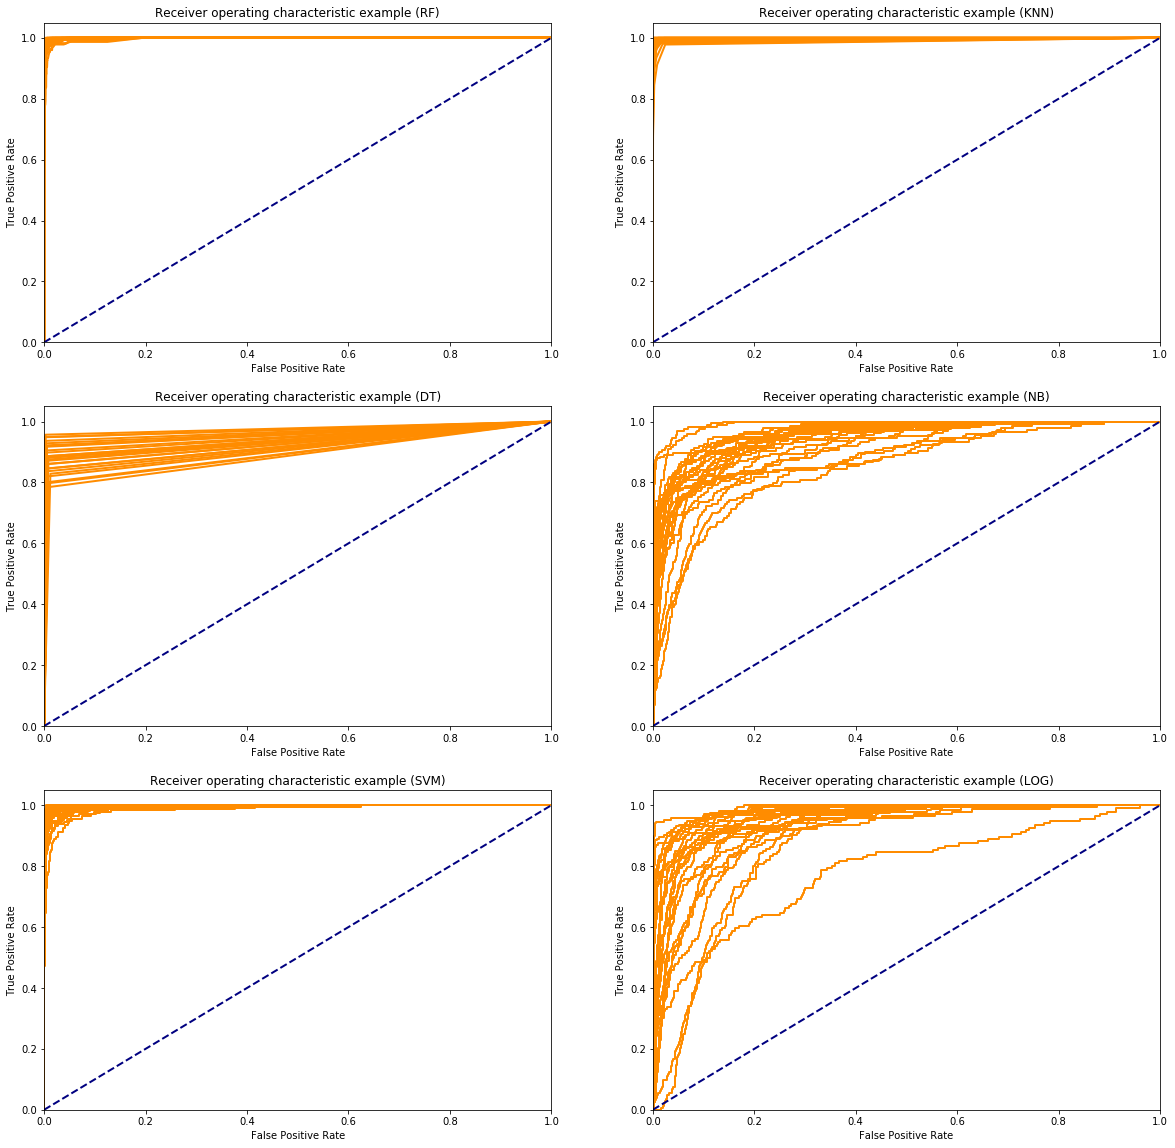

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [46]:
# plot ROC curve
fig, plots = plt.subplots(3,2, figsize=(20,20))
x = 0
y = 0
for md in RocAucResult.keys():
    plotRocCurve(RocAucResult, md, plots, x, y)
    if y == 1:
        y = 0
        x += 1
    else:
        y += 1

From above ROC Curve plots, RF provides the consistent best results for each class. Log/NB/DT give mixed performance - some classes predicted better than the others.

### Confusion Matrix
Select RF as the prediction model and generate confusion matrix

Text(115.0, 0.5, 'True/Actual')

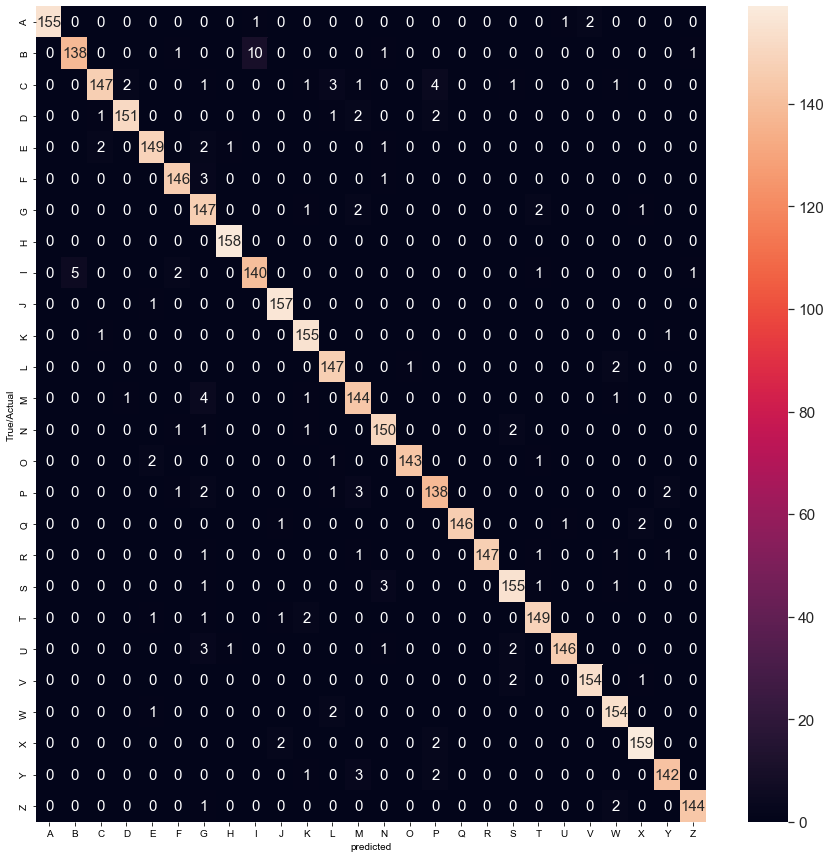

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import string

fig, ax = plt.subplots(figsize=(15,15))
predicted = models['RF'].fit(x_train, y_train).predict(x_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), list(string.ascii_uppercase),list(string.ascii_uppercase))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 15}, ax=ax)
plt.xlabel('predicted')
plt.ylabel('True/Actual')

### Mattews correlation coefficient (MCC)
MCC is used to measure the quality of classifications. A coefficient of 1 represents a perfect prediction, 0 represents a random prediction and -1 represents a inverse prediction. An inverse prediction occurs when using a statistical model to infer the value of an explanatory variable by a value of the response variable. Inverse prediction is sometimes referred to as calibration.

In [48]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predicted)

0.9638772904329944

### Feature Ranking

In [49]:
f_importance = pd.DataFrame(models['RF'].feature_importances_, columns=['importance'])
f_importance['feature'] = attributes[1:]
f_importance.sort_values(by = ['importance'], ascending = False, inplace = True)

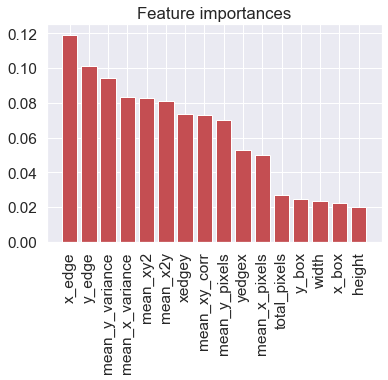

In [50]:
# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(f_importance['feature'], f_importance['importance'], color="r", align="center")
plt.xticks(rotation=90)
plt.show()

According to the importance value, x_edge (mean edge count left to right) feature has the highest importance.

### Principle Component Analysis
Use RandomForest model to perform PCA.

In [51]:
from sklearn.decomposition import PCA

pca = PCA()  
x_train_pca = pca.fit_transform(x_train)  
x_test_pca = pca.transform(x_test)  
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.26831082, 0.16400501, 0.10823812, 0.08548123, 0.06556958,
       0.06105878, 0.05587125, 0.03891206, 0.03711862, 0.03068354,
       0.02678855, 0.01657113, 0.01587067, 0.0134592 , 0.00742398,
       0.00463745])

Text(0.5, 1.0, 'variance')

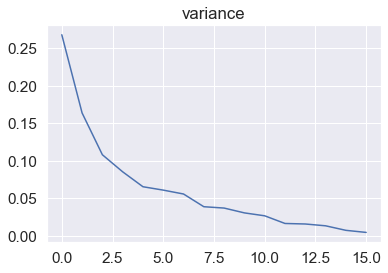

In [52]:
plt.plot(explained_variance)
plt.title("variance")

16

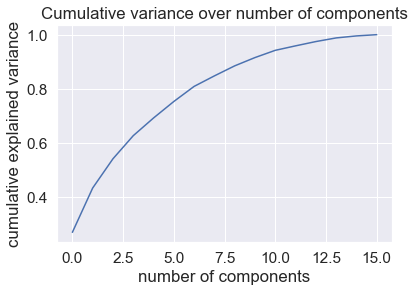

In [53]:
#choosing the right number of components
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title("Cumulative variance over number of components")
pca.n_components_

Based on the variance graphs above, with 12 principle components, it is able to cover over 95% of variance. That means reducing number of feature from 16 to 12, the model is still able to provide high accuracy. 

- Original RF model without PCA:

In [54]:
predicted = models['RF'].fit(x_train, y_train).predict(x_test)
print("Model Train Accuracy:", round(models['RF'].score(x_train, y_train), 4))
print("Model Test Accuracy", round(models['RF'].score(x_test, y_test), 4))
print("Model Precision", precision_score(y_test, predicted, average="macro"))
print("Model Recall", recall_score(y_test, predicted, average="macro"))
print("Model F1 Score", f1_score(y_test, predicted, average="macro"))

Model Train Accuracy: 1.0
Model Test Accuracy 0.9652
Model Precision 0.9657467485538261
Model Recall 0.9651427092530456
Model F1 Score 0.9652211478114645


- New RF model with PCA, set number of component to 12

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)  
x_train_pca = pca.fit_transform(x_train)  
x_test_pca = pca.transform(x_test) 

predicted = models['RF'].fit(x_train_pca, y_train).predict(x_test_pca)
print("Model Train Accuracy:", round(models['RF'].score(x_train_pca, y_train), 4))
print("Model Test Accuracy", round(models['RF'].score(x_test_pca, y_test), 4))
print("Model Precision", precision_score(y_test, predicted, average="macro"))
print("Model Recall", recall_score(y_test, predicted, average="macro"))
print("Model F1 Score", f1_score(y_test, predicted, average="macro"))

Model Train Accuracy: 1.0
Model Test Accuracy 0.934
Model Precision 0.9351476161831956
Model Recall 0.9337921975667935
Model F1 Score 0.933933723134768


As the result shows that accuracy and F1 Score drop from 97% to 94%. The overall model accuracy is still high despite of the reduction of feature components. 

### Conclusion
For letter recognition, instead of width and height of the letter, both x_edge and y_edge are the important features. In fact, the measurements of the letter edges (from left to right, top to bottom) provide the distinct characteristics of a letter.

Using classification model is one of the methods to perform letter recognitions. More sophisticated deep learning methods like TensorFlow or neural networks can be used to classify complex objects. For example, picture recognition, audio real time noise suppression etc.